In [85]:
# https://en.wikipedia.org/wiki/Zero-crossing_rate

import os
import librosa
import librosa.display
import IPython.display as idp
import matplotlib.pyplot as plt
import numpy as np

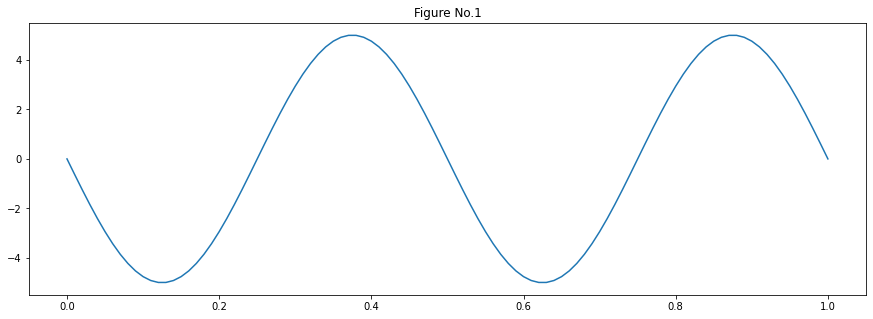

In [175]:
def get_sinusoid(AFP, LS):
    
    (A, f, phase) = AFP
    (L, step) = LS
    
    sinusoid = np.zeros(int(L/step) + 1)
    for i, _ in enumerate(sinusoid):
        sinusoid[i] = A * np.cos(2 * np.pi * (f * step * i + phase))
        
    return sinusoid

LS = (L, step) = (1, 0.01)

s1 = get_sinusoid((5, 2, 0.25), LS)
# s2 = get_sinusoid((3, 2, 0), LS)
# s3 = get_sinusoid((2, 3, 0), LS)

# signal = s1 + s2 + s3
signal = s1
t = np.arange(s1.size) * step

plt.figure(figsize=(15,5))
plt.plot(t, signal)
plt.title('Figure No.1')
plt.show()
    

In [178]:
def CFT(signal, f, LS):
    (L, step) = LS
    
    print(LS)
    
    R = 0.0
    I = 0.0
    
    max_real = 0
    for i, _ in enumerate(signal):
        if i == 0: continue
        
        i0 = i - 1   
        t0, t = i0 * step, i * step
        s0, s = signal[i0], signal[i]
        
        real0, real = s0 * np.cos(-2 * np.pi * f * t0), s * np.cos(-2 * np.pi * f * t)
        imgi0, imgi = s0 * np.sin(-2 * np.pi * f * t0), s * np.sin(-2 * np.pi * f * t)
        
        R = R + (real0 + real) * step / 2
        I = I + (imgi0 + imgi) * step / 2
        
    return (R, I)
    
def C2P(cartesian):
    (R, I) = cartesian
    
    A = np.sqrt(R * R + I * I)
    P = np.arcsin(I / A) / (2 * np.pi)
    
    return (A, P)
    
CF1 = CFT(signal, 2, LS)
PF1 = C2P(CF1)

print(PF1)
# CFT(signal, 2, LS)
# CFT(signal, 3, LS)

(1, 0.01)
(2.5000000000000018, 0.25)
